# Previsão de flores usando o SVM

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Dados\iris.csv")
dados

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dados.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dados.columns = ["comprimento_sépala", "largura_sépala", "comprimento_pétala", "largura_pétala", "espécie"]
dados.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dados.shape

(150, 5)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   comprimento_sépala  150 non-null    float64
 1   largura_sépala      150 non-null    float64
 2   comprimento_pétala  150 non-null    float64
 3   largura_pétala      150 non-null    float64
 4   espécie             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Estatistica

In [7]:
dados.describe()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Média

media_geral = dados.comprimento_sépala.mean()
print("A média geral é de {}". format(media_geral))

A média geral é de 5.843333333333335


In [9]:
#Mediana

mediana = dados.comprimento_sépala.median()
print("A mediana geral é de {}". format(mediana))

A mediana geral é de 5.8


In [10]:
# Moda

moda = dados.comprimento_sépala.mode()
print("A moda geral é de {}". format(moda))

A moda geral é de 0    5.0
dtype: float64


In [11]:
dados.groupby(["comprimento_pétala"]).mean()

,comprimento_sépala,largura_sépala,largura_pétala
comprimento_pétala,,,
1.0,4.600000,3.600000,0.200000
1.1,4.300000,3.000000,0.100000
1.2,5.400000,3.600000,0.200000
1.3,4.842857,3.228571,0.257143
1.4,4.916667,3.333333,0.216667
1.5,5.128571,3.535714,0.221429
1.6,4.914286,3.342857,0.285714
1.7,5.400000,3.600000,0.350000
1.9,4.950000,3.600000,0.300000


In [12]:
dados.groupby(["comprimento_pétala"]).median()

,comprimento_sépala,largura_sépala,largura_pétala
comprimento_pétala,,,
1.0,4.60,3.60,0.20
1.1,4.30,3.00,0.10
1.2,5.40,3.60,0.20
1.3,4.70,3.20,0.20
1.4,4.95,3.35,0.20
1.5,5.10,3.45,0.20
1.6,5.00,3.40,0.20
1.7,5.40,3.60,0.35
1.9,4.95,3.60,0.30


**Média**

In [13]:
print("Media:", dados["comprimento_sépala"].mean())

Media: 5.843333333333335


In [14]:
print("Media:", dados["largura_sépala"].mean())

Media: 3.0540000000000007


In [15]:
print("Media:", dados["comprimento_pétala"].mean())

Media: 3.7586666666666693


In [16]:
print("Media:", dados["largura_pétala"].mean())

Media: 1.1986666666666672


**Mediana**

In [17]:
print("Media:", dados["comprimento_sépala"].median())

Media: 5.8


In [18]:
print("Media:", dados["largura_sépala"].median())

Media: 3.0


In [19]:
print("Media:", dados["comprimento_pétala"].median())

Media: 4.35


In [20]:
print("Media:", dados["largura_pétala"].median())

Media: 1.3


**Moda**

In [21]:
print("Media:", dados["comprimento_sépala"].mode())

Media: 0    5.0
dtype: float64


In [22]:
print("Media:", dados["largura_sépala"].mode())

Media: 0    3.0
dtype: float64


In [23]:
print("Media:", dados["comprimento_pétala"].mode())

Media: 0    1.5
dtype: float64


In [24]:
print("Media:", dados["largura_pétala"].mode())

Media: 0    0.2
dtype: float64


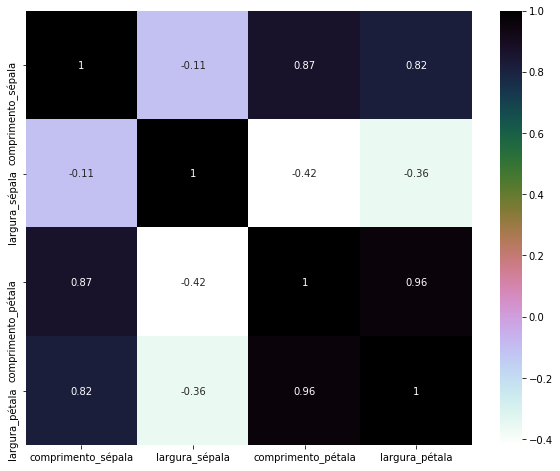

In [25]:
plt.figure(figsize=(10,8))

corr = sns.heatmap(dados.corr(), annot = True,cmap = 'cubehelix_r')
plt.show()

# Analise exploratória de dados

Text(0.5, 1.0, 'Análise da pétala')

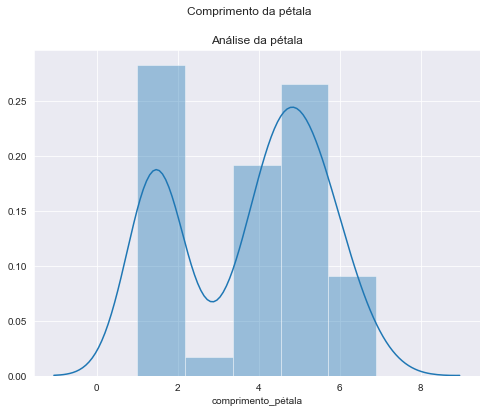

In [26]:
df = plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")

x1 = sns.distplot(dados['comprimento_pétala'], kde=True)
x1.figure.suptitle('Comprimento da pétala')
x1.set_title('Análise da pétala')

Text(0.5, 1.0, 'Análise da pétala')

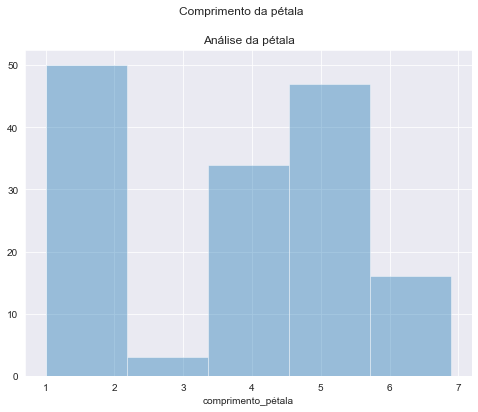

In [27]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["comprimento_pétala"], kde=False)
x1.figure.suptitle('Comprimento da pétala')
x1.set_title('Análise da pétala')

Text(0.5, 1.0, 'Análise da pétala')

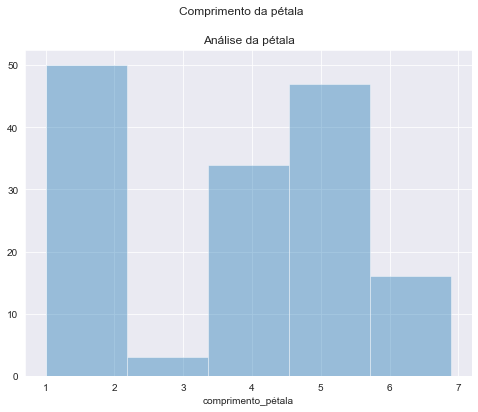

In [28]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["comprimento_pétala"], kde=False)
x1.figure.suptitle('Comprimento da pétala')
x1.set_title('Análise da pétala')

Text(0.5, 1.0, 'Análise da Sépala')

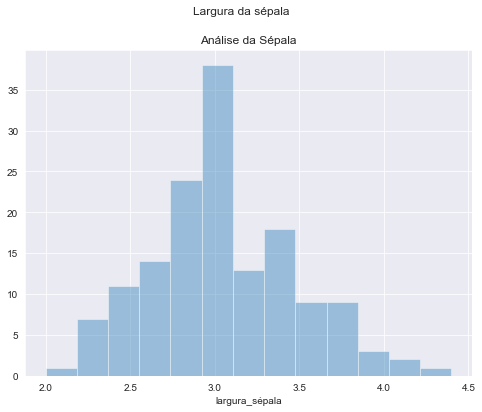

In [29]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["largura_sépala"], kde=False)
x1.figure.suptitle('Largura da sépala')
x1.set_title('Análise da Sépala')

Text(0.5, 1.0, 'Análise da pétala')

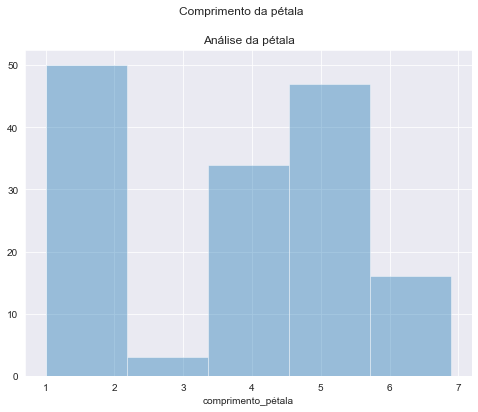

In [30]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["comprimento_pétala"], kde=False)
x1.figure.suptitle('Comprimento da pétala')
x1.set_title('Análise da pétala')

Text(0.5, 1.0, 'Análise da pétala')

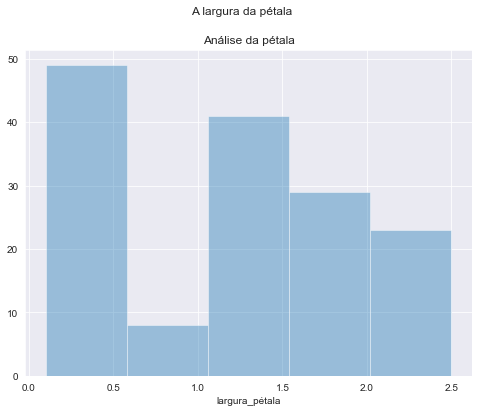

In [31]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["largura_pétala"], kde=False)
x1.figure.suptitle('A largura da pétala')
x1.set_title('Análise da pétala')

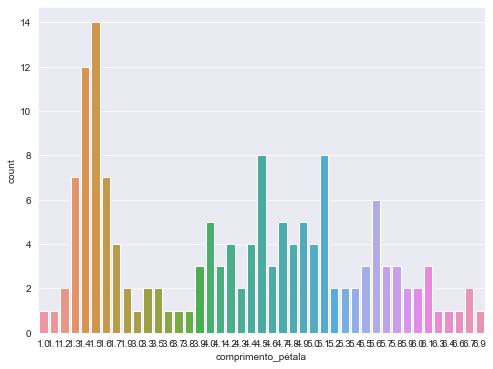

In [32]:
#comprimento_pétala
df = plt.figure(figsize=(8, 6))

sns.countplot(x="comprimento_pétala", data=dados)

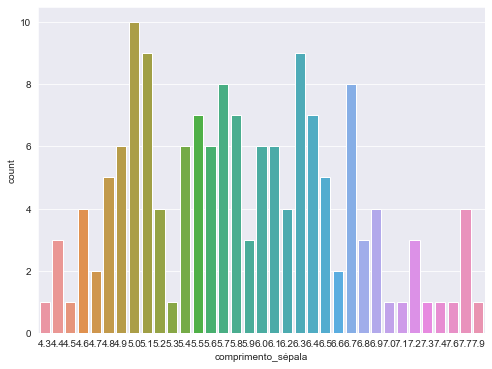

In [33]:
df = plt.figure(figsize=(8, 6))

sns.countplot(x="comprimento_sépala", data=dados)

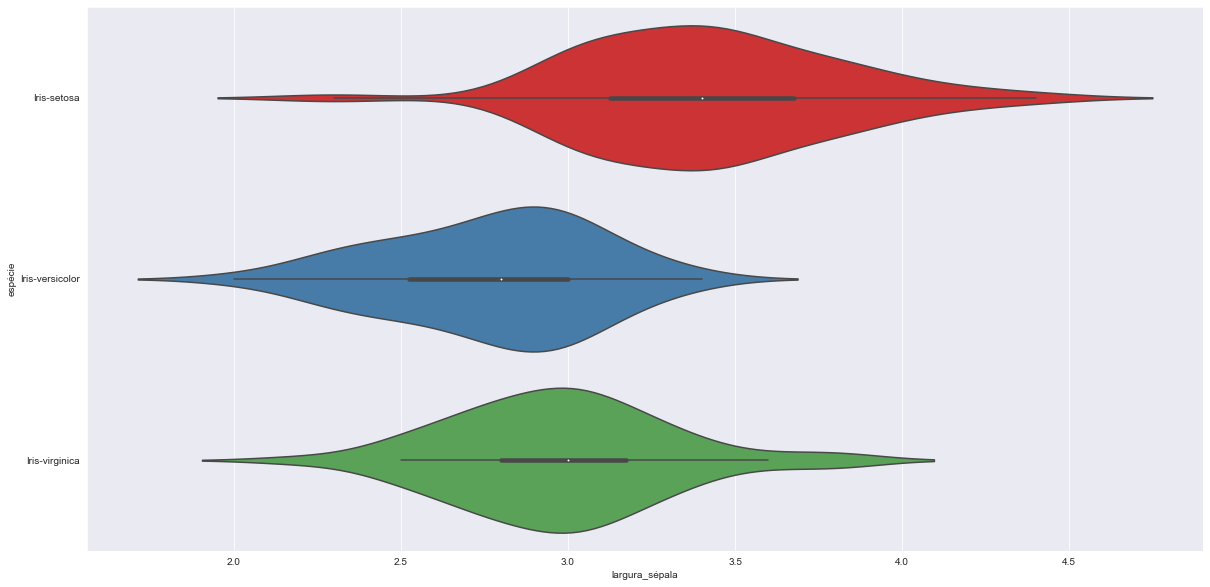

In [34]:
df = plt.figure(figsize=(20, 10))

df = sns.violinplot(x="largura_sépala", y="espécie", data=dados, palette="Set1" , scale="count")
plt.show()

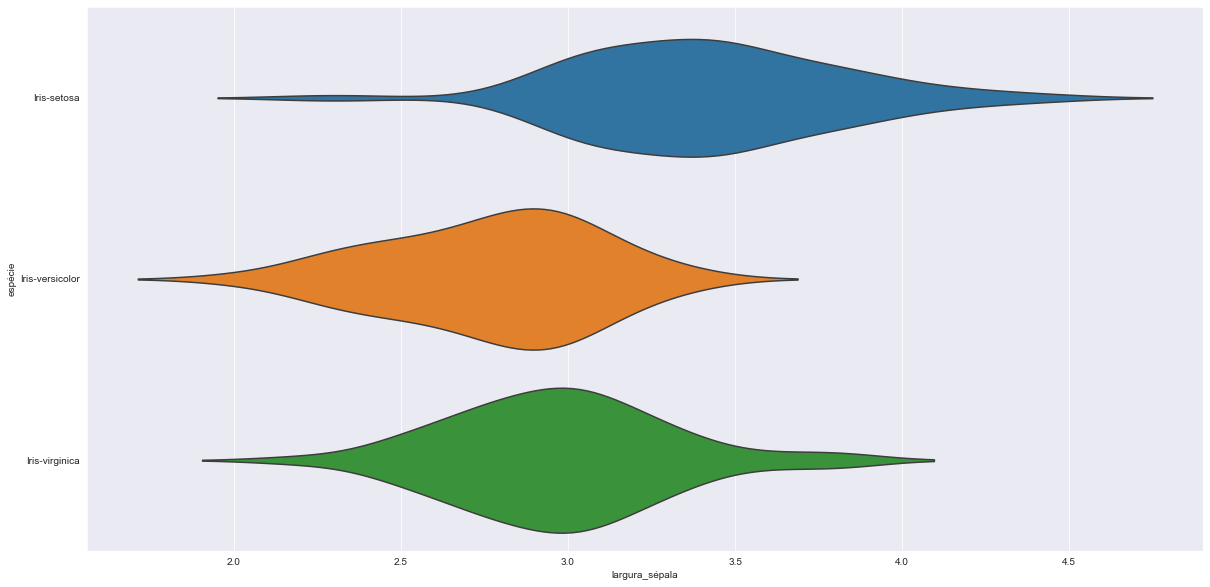

In [35]:
df = plt.figure(figsize=(20, 10))

df = sns.violinplot(x="largura_sépala", y="espécie", data=dados, inner=None)
plt.show()

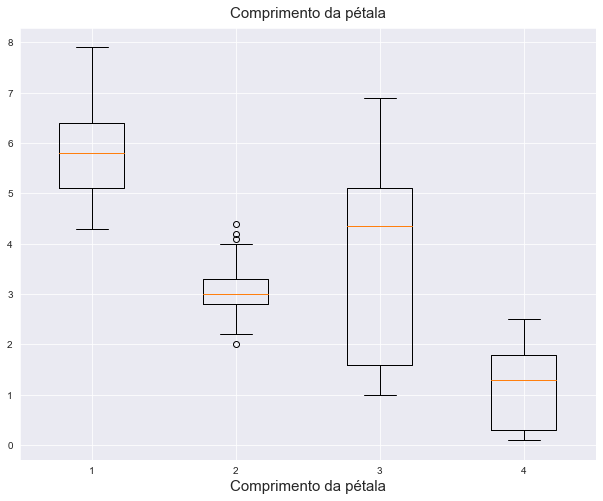

In [36]:
df = plt.figure(figsize=(8, 6))
xf = df.add_axes([0,0,1,1])

xf.boxplot(dados.drop("espécie", axis=1).values)
x1 = xf.set_title("Comprimento da pétala", fontsize=15, pad=10)
x1 = xf.set_xlabel("Comprimento da pétala", fontsize=15)

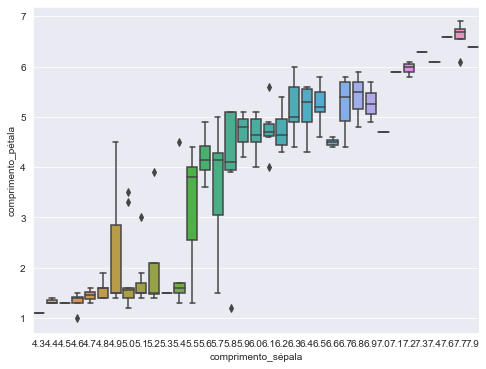

In [37]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x="comprimento_sépala", y="comprimento_pétala", data=dados)

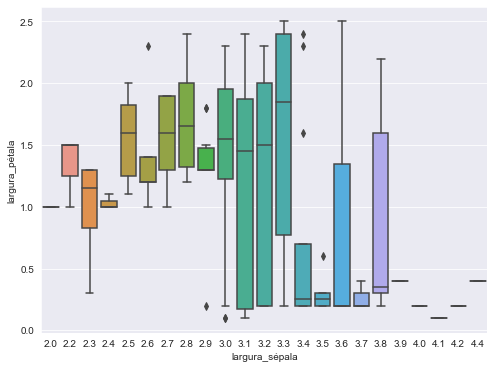

In [38]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x="largura_sépala", y="largura_pétala", data=dados)

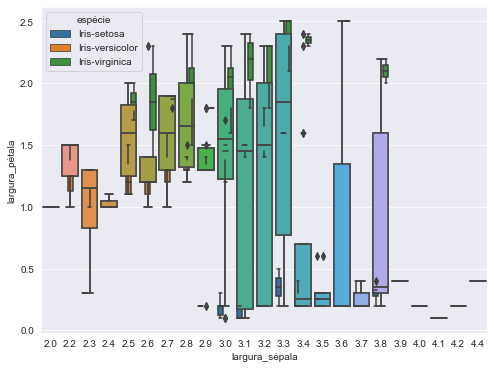

In [39]:
df = plt.figure(figsize=(8, 6))

sns.boxplot(x='largura_sépala', y='largura_pétala', data=dados)  
sns.boxplot(x='largura_sépala', y='largura_pétala', data=dados, hue='espécie')  
sns.boxplot(x='largura_sépala', y='largura_pétala', data=dados) 

<Figure size 1440x720 with 0 Axes>

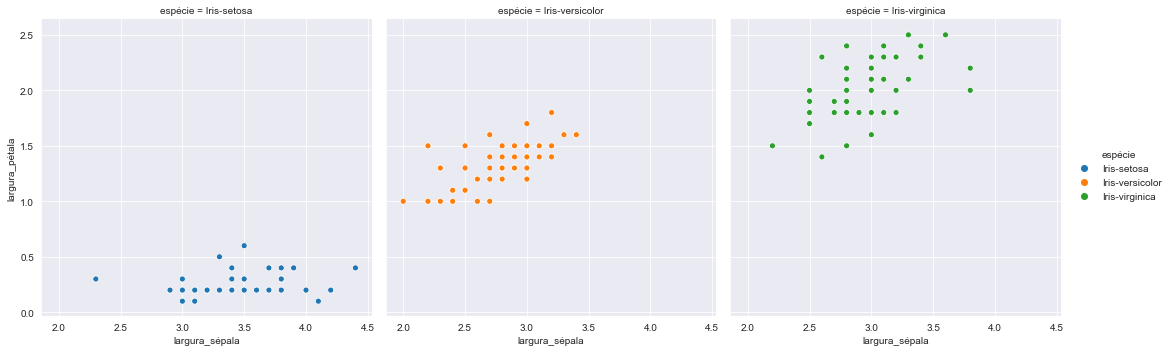

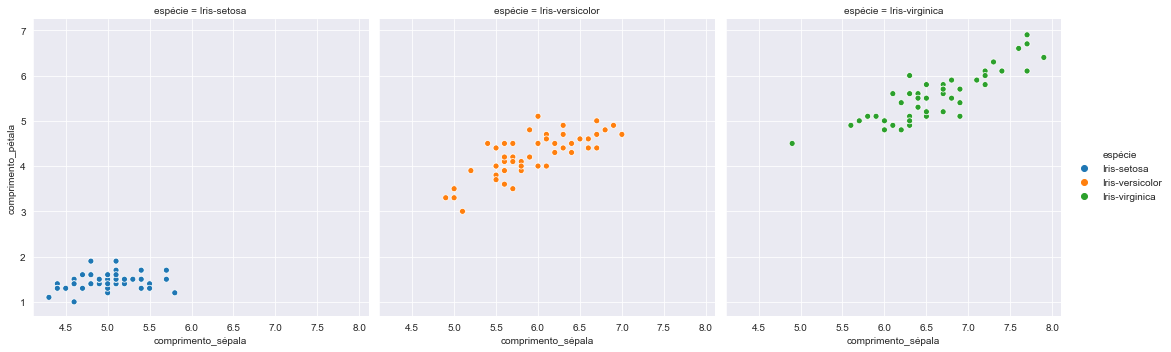

In [40]:
df = plt.figure(figsize=(20, 10))

df = sns.relplot(x="largura_sépala", y="largura_pétala", hue = "espécie", col = "espécie", data=dados)
df = sns.relplot(x="comprimento_sépala", y="comprimento_pétala", hue = "espécie", col = "espécie", data=dados)

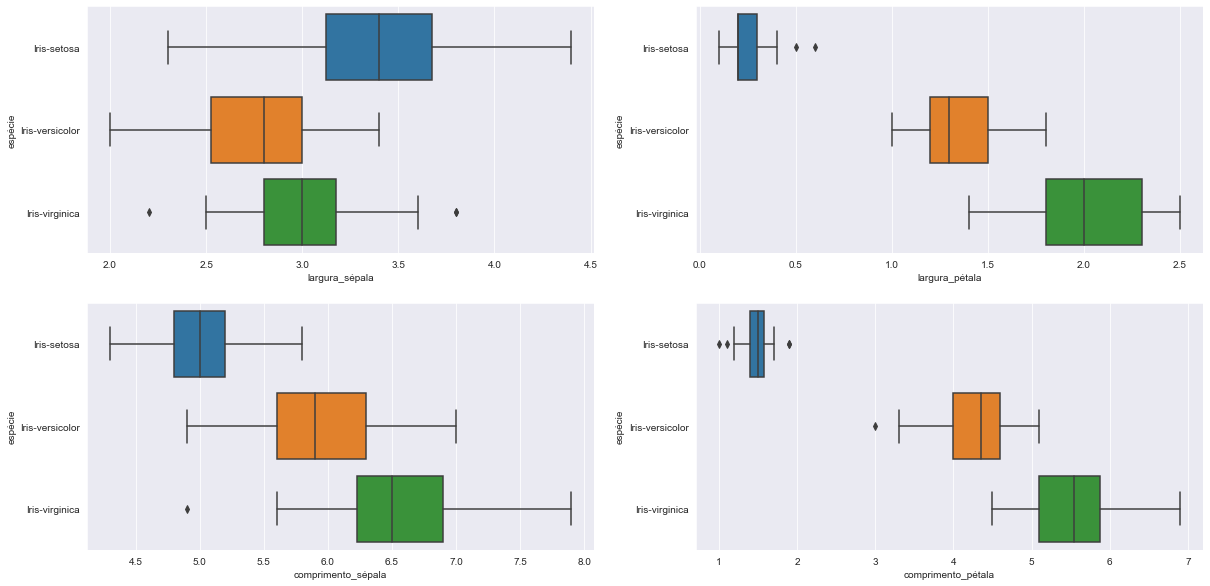

In [41]:
df = plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
df = sns.boxplot(x="largura_sépala", y="espécie", data=dados)
plt.subplot(2,2,2)
df = sns.boxplot(x="largura_pétala", y="espécie", data=dados)
plt.subplot(2,2,3)
df = sns.boxplot(x="comprimento_sépala", y="espécie", data=dados)
plt.subplot(2,2,4)
df = sns.boxplot(x="comprimento_pétala", y="espécie", data=dados)

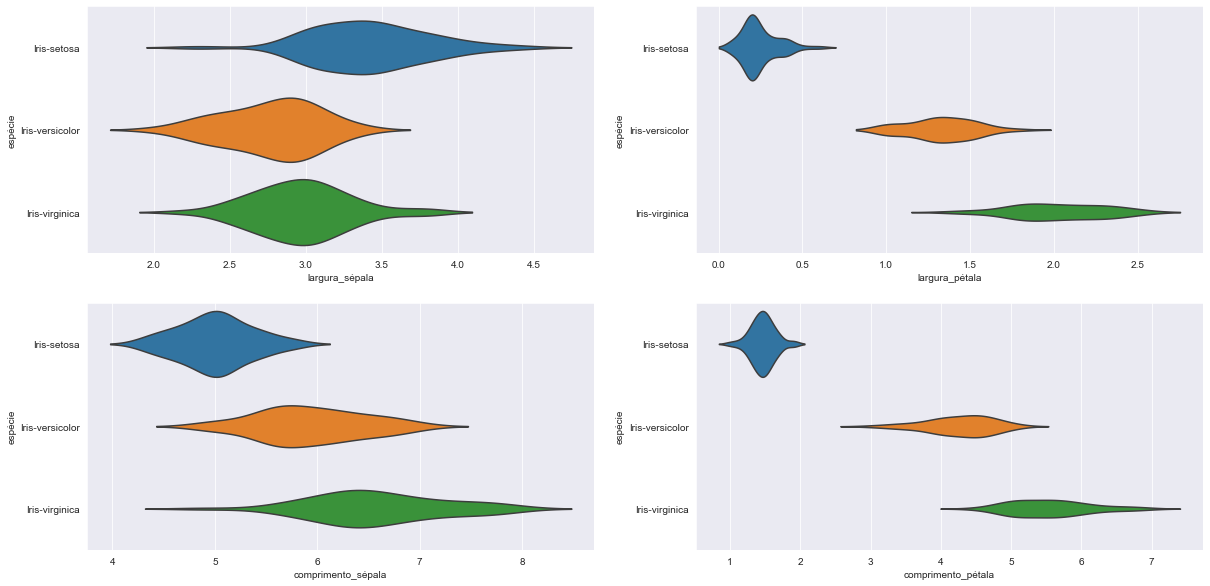

In [42]:
df = plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
df = sns.violinplot(x="largura_sépala", y="espécie", data=dados, inner=None)
plt.subplot(2,2,2)
df = sns.violinplot(x="largura_pétala", y="espécie", data=dados, inner=None)
plt.subplot(2,2,3)
df = sns.violinplot(x="comprimento_sépala", y="espécie", data=dados, inner=None)
plt.subplot(2,2,4)
df = sns.violinplot(x="comprimento_pétala", y="espécie", data=dados, inner=None)

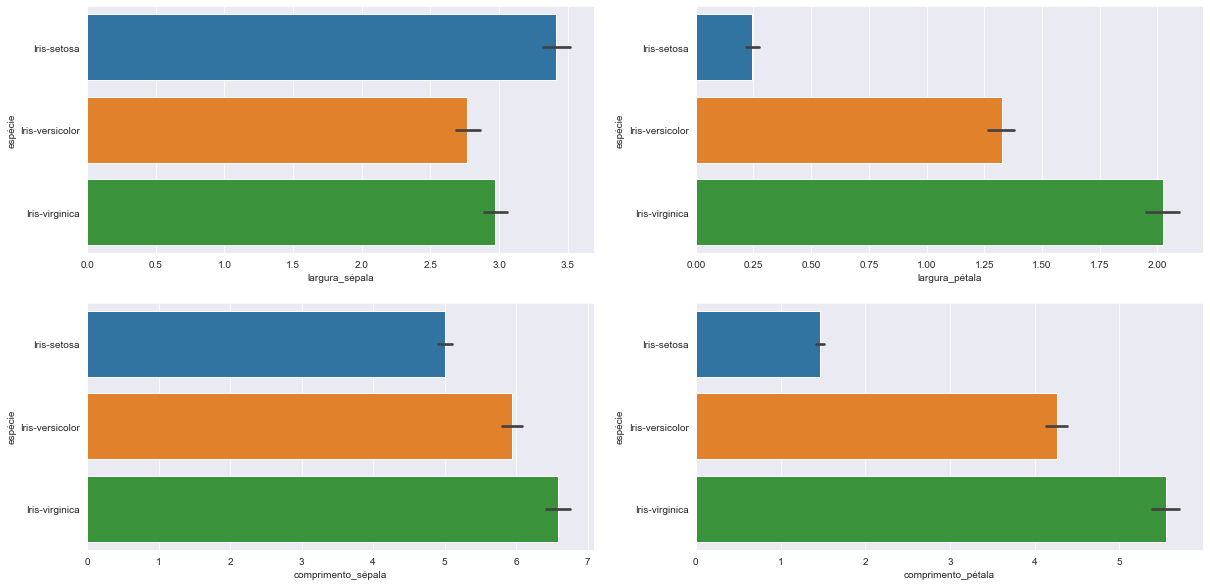

In [43]:
df = plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
df = sns.barplot(x="largura_sépala", y="espécie", data=dados)
plt.subplot(2,2,2)
df = sns.barplot(x="largura_pétala", y="espécie", data=dados)
plt.subplot(2,2,3)
df = sns.barplot(x="comprimento_sépala", y="espécie", data=dados)
plt.subplot(2,2,4)
df = sns.barplot(x="comprimento_pétala", y="espécie", data=dados)

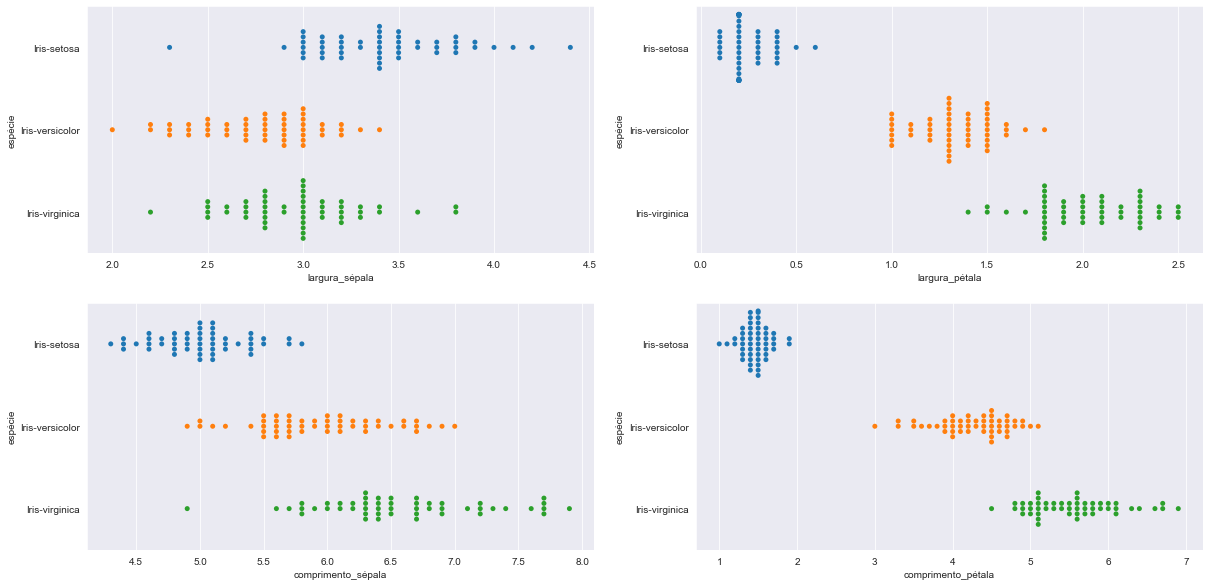

In [44]:
df = plt.figure(figsize=(20, 10))

plt.subplot(2,2,1)
df = sns.swarmplot(x="largura_sépala", y="espécie", data=dados)
plt.subplot(2,2,2)
df = sns.swarmplot(x="largura_pétala", y="espécie", data=dados)
plt.subplot(2,2,3)
df = sns.swarmplot(x="comprimento_sépala", y="espécie", data=dados)
plt.subplot(2,2,4)
df = sns.swarmplot(x="comprimento_pétala", y="espécie", data=dados)

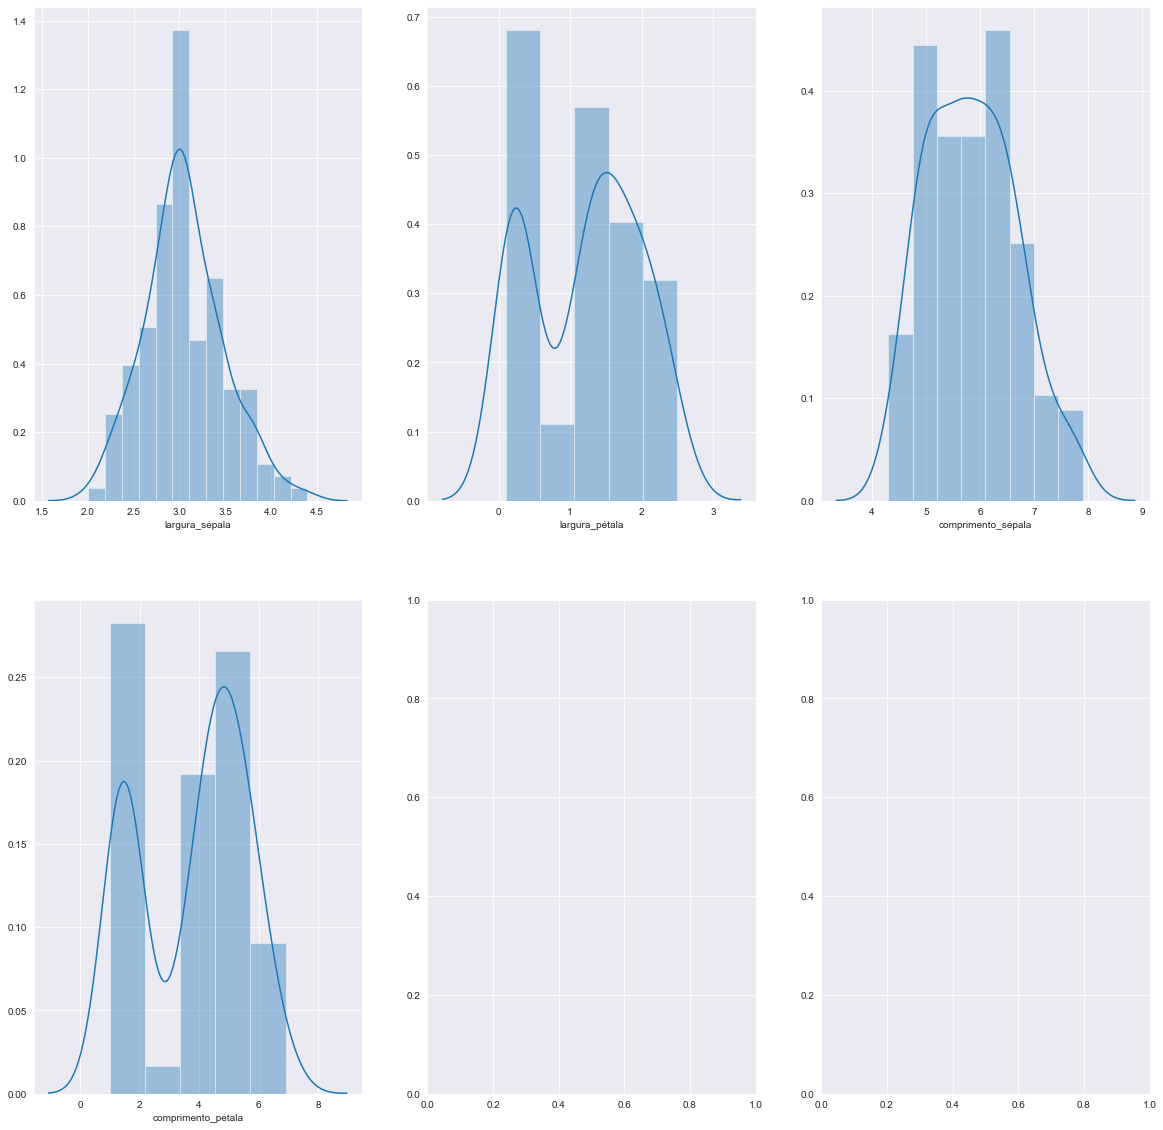

In [45]:
fig, aes = plt.subplots(nrows = 2, ncols = 3 , figsize = (20,20))

df = sns.distplot(dados["largura_sépala"], ax = aes[0,0])
df = sns.distplot(dados["largura_pétala"], ax = aes[0,1])
df = sns.distplot(dados["comprimento_sépala"], ax = aes[0,2])
df = sns.distplot(dados["comprimento_pétala"], ax = aes[1,0])

plt.show()

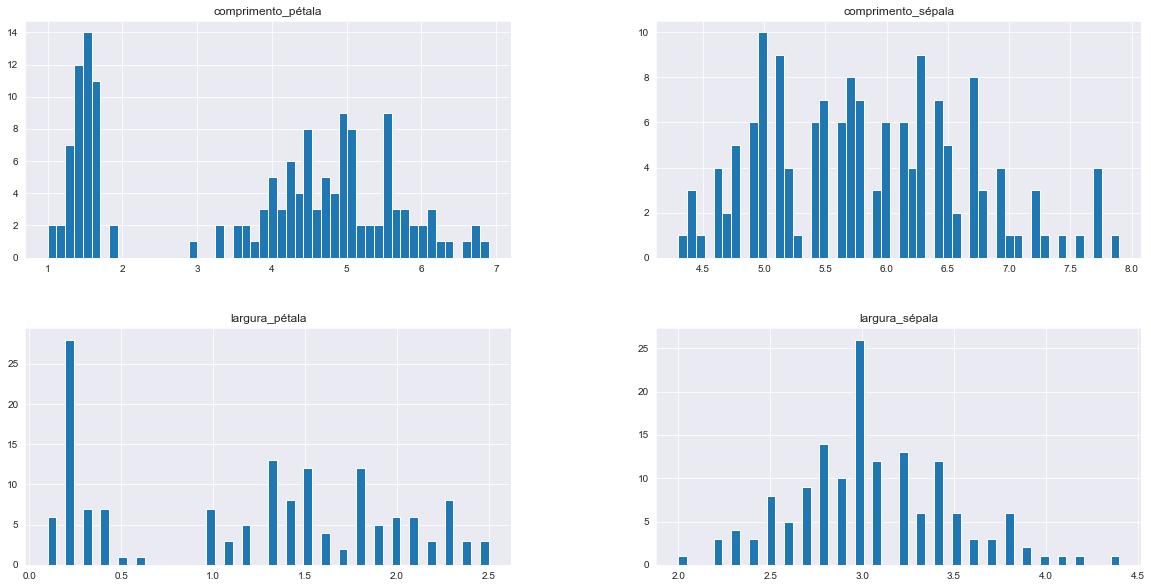

In [46]:
dados.hist(bins = 50, figsize=(20, 10))
plt.show()

<Figure size 720x576 with 0 Axes>

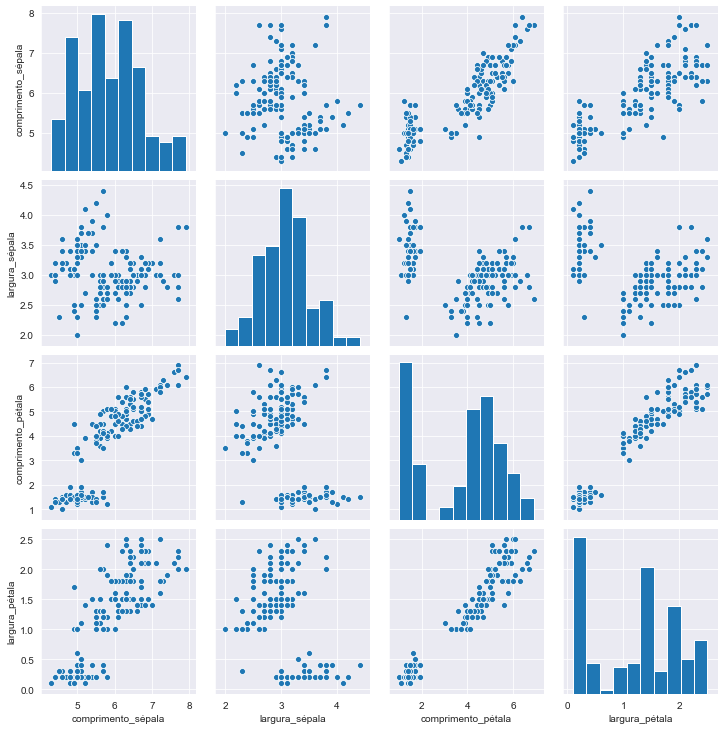

In [47]:
plt.figure(figsize=(10,8))

df = sns.pairplot(dados)

# Modelo machine learning

In [48]:
x1 = dados.iloc[:, 1:4].values
x2 = dados.iloc[:, 4].values

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(x1[:, 1:4])
x1[:, 1:4] = imputer.transform(x1[:, 1:4])

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit_transform(x1)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.30, random_state = 0)

**SVM**

In [52]:
from sklearn import svm

svm = svm.SVC(kernel ='linear') 
svm.fit(X_train, y_train)
svm_score = svm.score(X_train, y_train)
print("Score SVM:", svm_score)

Score SVM: 0.9714285714285714


In [53]:
svm_pred = svm.predict(X_test)
print("Predict SVM", svm_pred)

Predict SVM ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score

Acuracia = accuracy_score(y_test, svm_pred)
Matrix = confusion_matrix(y_test, svm_pred)

print("Acuracia: %.2f" %(Acuracia * 100))

Acuracia: 97.78


Matrix de confussão 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



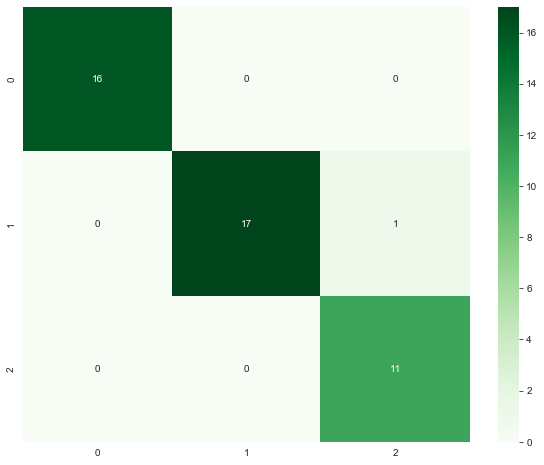

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

matrix = classification_report(y_test, svm_pred)
print("Matrix de confussão \n", matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(Matrix, annot = True, cmap = "Greens")
plt.show()

# Conclusão do modelo de machine learning

**Espécie das flores**

Iris-setosa - 16       

Iris-versicolor - 18 

Iris-virginica - 11

Nesta conclusão o modelo de machine learning teve uma acuracia de 97.78% a espécie que tem mais é Iris-versicolor !